In [122]:
import numpy as np
np.random.seed(2023 - 7 - 1)
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

# ___Testing Population Means With Confidence___
-----------------

In [2]:
# let's use our iol temperature data.

oil = pd.read_csv("./../data/MetroPT3(AirCompressor).csv", usecols = ["Oil_temperature"])

In [3]:
oil.shape

(999999, 1)

In [4]:
oil.mean()

Oil_temperature    60.91454
dtype: float64

## ___Considering The Dataset as a Sample of a Larger Population___
--------------------

In [5]:
# best estimate will be the sample mean.

best_est = oil.Oil_temperature.mean()
best_est

60.91453961453962

In [6]:
# sample size 

ssize = oil.shape[0]
ssize

999999

In [7]:
# Significance level 5%, alpha = 0.05.
# i.e We accept that 5 out of 100 times, we may get the given test statistic (t) completely randomly, due to chance.
# That is if the probability of randomly getting our t statistic is greater than 0.05, we refuse to accept the null hypothesis.

# Null hypothesis: Population mean is 61 degrees celsius.
# H0: mu = 61

# Alternative hypothesis: Population mean is greater than 61 degrees celsius
# H1: mu > 61

In [8]:
# test statistic = (best estimate - hypothesized estimate) / standard error of the estimate
# We do not know the standard error of the population, so we'll use the standard error of the sample.
# estimated standard error

stderr = oil.Oil_temperature.std() / np.sqrt(ssize)
stderr

0.006738252131068929

In [9]:
tscore = (best_est - 61) / stderr
tscore

-12.68287143283586

In [10]:
# How do we interpret this t statistic?
# Our actual population mean is 12.6828 times the standard errors less than our hypothesized mean.

In [11]:
# Assumptions

# 1) Our sample is a simple random sample.
# 2) Our sample means come from a normal distribution.

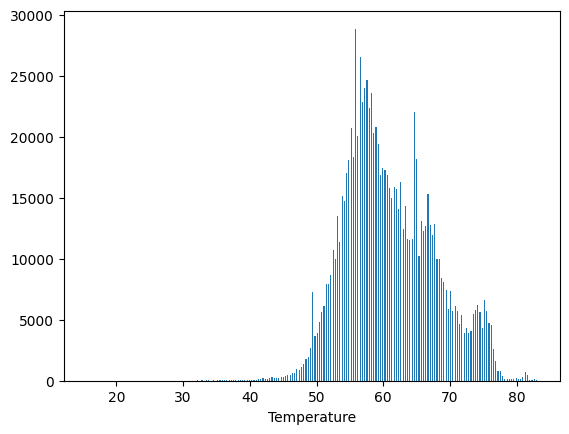

In [12]:
fig, axes = plt.subplots()
axes.hist(oil.Oil_temperature, bins = 200, rwidth = 0.5)
axes.set_xlabel("Temperature")
plt.show()

In [13]:
np.linspace(0, 1, num = 20, endpoint = False)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

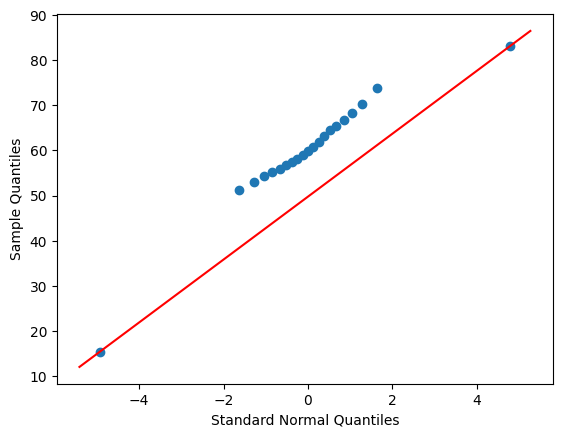

In [14]:
# Our sample seems left skewed, oopsies.
# Let's have a QQ plot.

q = np.linspace(0, 1, num = 21)
snorm = np.random.standard_normal(size = ssize)

q_snorm = np.quantile(snorm, q)
q_sample = np.quantile(oil.Oil_temperature, q)

fig, axes = plt.subplots()
axes.scatter(q_snorm, q_sample)
axes.plot(axes.get_xbound(), axes.get_ybound(), color = "red")
axes.set_xlabel("Standard Normal Quantiles")
axes.set_ylabel("Sample Quantiles")
plt.show()

In [39]:
# There are deviations in the QQ plot!

In [17]:
# p value for null hypothesis,

# Our alternative hypothesis claimed that the population mean is greater than 61.0,
# so, our p should cover the area of the t distribution on the right of the line,

p = 1 - t.cdf(tscore, df = ssize - 1)
p

1.0

In [138]:
# So, with this p value, we cannot reject the Null hypothesis,
# because the p value is greater than the specified significance.

# So, we claim that there's enough evidence to assert that the mean of population is indeed equal to 61.0

In [94]:
# The probability of a random normal value being greater than the given t score is 1, almost 1.0
# The probability of a standard random normal value being less than the given t socre,

p_ = t.cdf(tscore, df = ssize - 1)
p_

3.703464581479672e-37

In [61]:
tdist = t(df = ssize - 1)
vals = np.linspace(-4, 4, num = 100_000, endpoint = True)
tvals = tdist.pdf(vals)

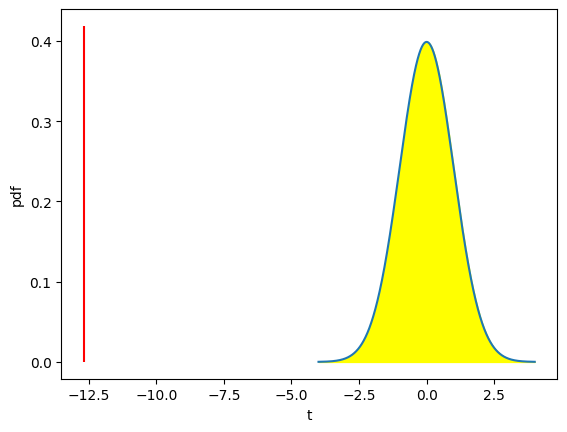

In [97]:
fig, axes = plt.subplots()
axes.plot(vals, tvals)
axes.vlines(x = tscore, ymin = 0, ymax = axes.get_ybound()[1], color = "red")
axes.fill_between(y1 = tvals, y2 = 0, x = vals, color = "yellow", where = vals >= tscore)
axes.set_xlabel("t")
axes.set_ylabel("pdf")
plt.show()

In [103]:
# Yay!

1 - t.cdf(0.82, df = 24)

0.2101428819508041

## ___Using the Dataset as a Population.___
--------------------

In [106]:
pop_mean = oil.Oil_temperature.mean()
pop_mean

60.91453961453962

In [107]:
oil.size

999999

In [108]:
# Sample of 10,000

sample = oil.Oil_temperature[np.random.randint(low = 0, high = oil.size, size = 10_000)]
sample_mean = sample.mean()
sample_mean

60.991279999999996

In [109]:
# Our best estimate for the population mean is the sample mean.
# Significance alpha = 0.05

# Null: Population mean is 61.0
# Alternative: Population mean is not equal to 61.0 (two way t test.)

In [110]:
# Test statistic,
# Here, we do know the standard error of the population, but we'll use the standard error estimated from the sample.

stderr_pop = oil.Oil_temperature.std() / np.sqrt(oil.size)
stderr_pop

0.006738252131068929

In [111]:
stderr_sample = sample.std() / np.sqrt(sample.size)
stderr_sample

0.06683150897008926

In [121]:
tscore = (sample_mean - 61) / stderr_sample
tscore

-0.1304773771291998

In [120]:
# That mean our true population mean is t times standard errors less than the hypothesized mean!

61 - (stderr_sample * abs(t))

60.991279999999996

In [134]:
t.cdf(tscore, df = sample.size - 1)

0.4480956881541758

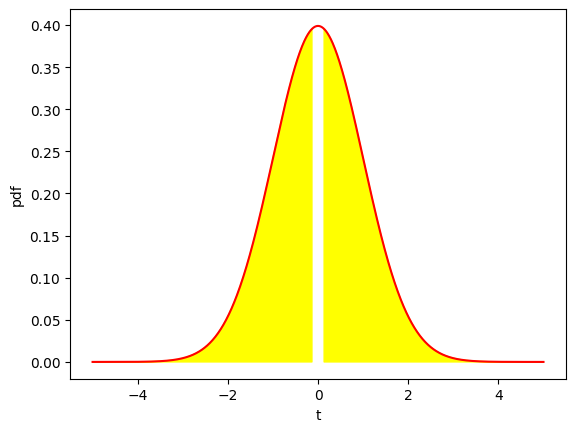

In [135]:
# Since our t test was two tailed, we should consider instances when the population mean was less than the hypothesized mean
# and instances when the population mean was greater than the hypothesized mean.

x = np.linspace(-5, 5, num = 1000, endpoint = True)
tdist = t(df = sample.size - 1).pdf(x)

fig, axes = plt.subplots()
axes.plot(x, tdist, color = "red")
axes.fill_between(y1 = tdist, y2 = 0, x = x, color = "yellow", where = (x <= tscore) | (x >= abs(tscore)))
axes.set_xlabel("t")
axes.set_ylabel("pdf")
plt.show()

In [136]:
# One yellow area is equivalent to

t.cdf(tscore, df = sample.size - 1)

0.4480956881541758

In [137]:
# The area of the curve, since we need the two yellow regions (due to our test design being a two tailed test)

p = 2 * t.cdf(tscore, df = sample.size - 1)
p

0.8961913763083516

In [ ]:
# That's a large p value.
# Much bigger than our significance level of 0.05

# So, we cannot reject the Null hypothesis.
# So, we'll propose that there is enough evidence that the population mean is indeed equal to 61.0

## ___Confidence Intervals___
-----------------

In [162]:
# Considering the dataset as the population.
# That's our best estimate,

sample_mean

60.991279999999996

In [164]:
# We'll use a 95% confidence level,

tstar = t.ppf(0.95, df = sample.size - 1)
tstar

1.6450060333112988

In [165]:
# Standard error (estimated), even though we here have the chance to compute the true standard error of the population,

stderr = sample.std() / np.sqrt(sample.size)
stderr

0.06683150897008926

In [166]:
# Margin of error

moerr = tstar * stderr
moerr

0.109938235471095

In [167]:
# Confidence interval,

best_est - moerr, best_est + moerr

(60.80460137906852, 61.02447785001072)

In [139]:
# Considering the dataset as a sample;

best_est = oil.Oil_temperature.mean()
best_est

60.91453961453962

In [152]:
# Margin of error = multiplier * standard error
# We'll use the t multiplier since we are dealing with means.
# With 95% confidence

tstar = t.ppf(0.95, df = oil.size - 1)
tstar

1.6448551507250875

In [153]:
stderr = oil.Oil_temperature.std() / np.sqrt(oil.size)
stderr

0.006738252131068929

In [154]:
moerr = tstar * stderr
moerr

0.011083448724673026

In [155]:
# 95% confidence interval;

best_est - moerr, best_est + moerr

(60.903456165814944, 60.9256230632643)

In [159]:
t.ppf(0.99, df = oil.size - 1)

2.326351603128263

In [151]:
t.ppf(0.95, 24)

1.7108820799094275

In [ ]:
# IF WE ARE NOT CONVINCED ABOUT THE NORMALITY OF OUR SAMPLE, IN CASE THERE'S A SKEWEDNESS OR EXTREME OUTLIERS,
# THERE ARE NON-PARAMETRIC TESTS THAT CAN HELP US OVERCOME SUCH HINDRANCES!.
# E.G. WILCOXON-SIGNED-RANK TEST FOR EXAMPLE.